In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
sns.set_style("whitegrid")
warnings.filterwarnings('ignore')

In [30]:
ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [31]:
ev_data.head().T

,0,1,2,3,4
VIN (1-10),5YJYGDEE1L,7SAYGDEE9P,5YJSA1E4XK,5YJSA1E27G,5YJYGDEE5M
County,King,Snohomish,King,King,Kitsap
City,Seattle,Bothell,Seattle,Issaquah,Suquamish
State,WA,WA,WA,WA,WA
Postal Code,98122.0,98021.0,98109.0,98027.0,98392.0
Model Year,2020,2023,2019,2016,2021
Make,TESLA,TESLA,TESLA,TESLA,TESLA
Model,MODEL Y,MODEL Y,MODEL S,MODEL S,MODEL Y
Electric Vehicle Type,Battery Electric Vehicle (BEV),Battery Electric Vehicle (BEV),Battery Electric Vehicle (BEV),Battery Electric Vehicle (BEV),Battery Electric Vehicle (BEV)
Clean Alternative Fuel Vehicle (CAFV) Eligibility,Clean Alternative Fuel Vehicle Eligible,Eligibility unknown as battery range has not b...,Clean Alternative Fuel Vehicle Eligible,Clean Alternative Fuel Vehicle Eligible,Eligibility unknown as battery range has not b...


* **VIN (1-10)**: Partial Vehicle Identification Number.
* **County**: The county in which the vehicle is registered.
* **City**: The city in which the vehicle is registered.
* **State**: The state in which the vehicle is registered. It appears that this dataset may be focused on Washington (WA) state.
* **Postal Code** : The postal code where the vehicle is registered.
* **Model Year**: The year of the vehicle model.
* **Make**: The manufacturer of the vehicle.
* **Model**: The model of the vehicle.
* **Electric Vehicle Type**: The type of electric vehicle, e.g., Battery Electric Vehicle (BEV).
* **Clean Alternative Fuel Vehicle (CAFV) Eligibility**: Eligibility status for clean alternative fuel vehicle programs.
* **Electric Range**: The maximum range of the vehicle on a single charge (in miles).
* **Base MSRP**: The Manufacturer’s Suggested Retail Price.
* **Legislative District**: The legislative district where the vehicle is registered.
* **DOL Vehicle ID**: Department of Licensing Vehicle Identification.
* **Vehicle Location**: Geographic coordinates of the vehicle location.
* **Electric Utility**: The electric utility service provider for the vehicle’s location.
* **2020 Census Tract**: The census tract for the vehicle’s location.

In [32]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [33]:
ev_data.shape

(177866, 17)

In [34]:
ev_data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,177861.000000,177866.000000,177866.000000,177866.000000,177477.000000,1.778660e+05,1.778610e+05
mean,98172.453506,2020.515512,58.842162,1073.109363,29.127481,2.202313e+08,5.297672e+10
std,2442.450668,2.989384,91.981298,8358.624956,14.892169,7.584987e+07,1.578047e+09
min,1545.000000,1997.000000,0.000000,0.000000,1.000000,4.385000e+03,1.001020e+09
25%,98052.000000,2019.000000,0.000000,0.000000,18.000000,1.814743e+08,5.303301e+10
50%,98122.000000,2022.000000,0.000000,0.000000,33.000000,2.282522e+08,5.303303e+10
75%,98370.000000,2023.000000,75.000000,0.000000,42.000000,2.548445e+08,5.305307e+10
max,99577.000000,2024.000000,337.000000,845000.000000,49.000000,4.792548e+08,5.603300e+10


In [35]:
ev_data.isnull().sum()

,0
VIN (1-10),0
County,5
City,5
State,0
Postal Code,5
Model Year,0
Make,0
Model,0
Electric Vehicle Type,0
Clean Alternative Fuel Vehicle (CAFV) Eligibility,0


In [36]:
ev_data.duplicated().sum()

0

In [37]:
ev_data = ev_data.dropna()

#### For the task of market size of electric vehicles analysis, we can explore the following areas:

1. **EV Adoption Over Time**  
   - Analyze the number of EV registrations by model year.  
   - Use time series visualization (e.g., line charts) to show growth trends.  
   - Identify key events that may have influenced adoption (e.g., policy changes, new model releases).  

2. **Geographical Distribution**  
   - Map EV registrations by location (county/city/state).  
   - Identify hotspots for EV adoption and potential areas for market expansion.  
   - Compare adoption rates in urban vs. rural areas.  

3. **EV Types Breakdown**  
   - Categorize EVs by type (Battery Electric Vehicles - BEV, Plug-in Hybrid - PHEV, etc.).  
   - Show proportions using bar charts or pie charts.  
   - Highlight trends in preferences over time.  

4. **Make and Model Popularity**  
   - Rank the most registered EV makes and models.  
   - Compare trends between brands (e.g., Tesla vs. Nissan vs. Ford).  
   - Examine if certain models dominate specific regions.  

5. **Electric Range Analysis**  
   - Analyze EV ranges across different model years.  
   - Compare real-world vs. manufacturer-stated ranges.  
   - Identify improvements in battery technology over time.  

6. **Estimated Growth in Market Size**  
   - Forecast future EV adoption using historical data and predictive modeling.  
   - Consider factors like government incentives, charging infrastructure, and fuel prices.  
   - Use regression models or time series forecasting to estimate market growth.  

   ---

Let's begin by analyzing **EV Adoption Over Time** by visualizing the number of EVs registered by model year. This will help us understand how the EV population has grown over the years and identify key trends in adoption.

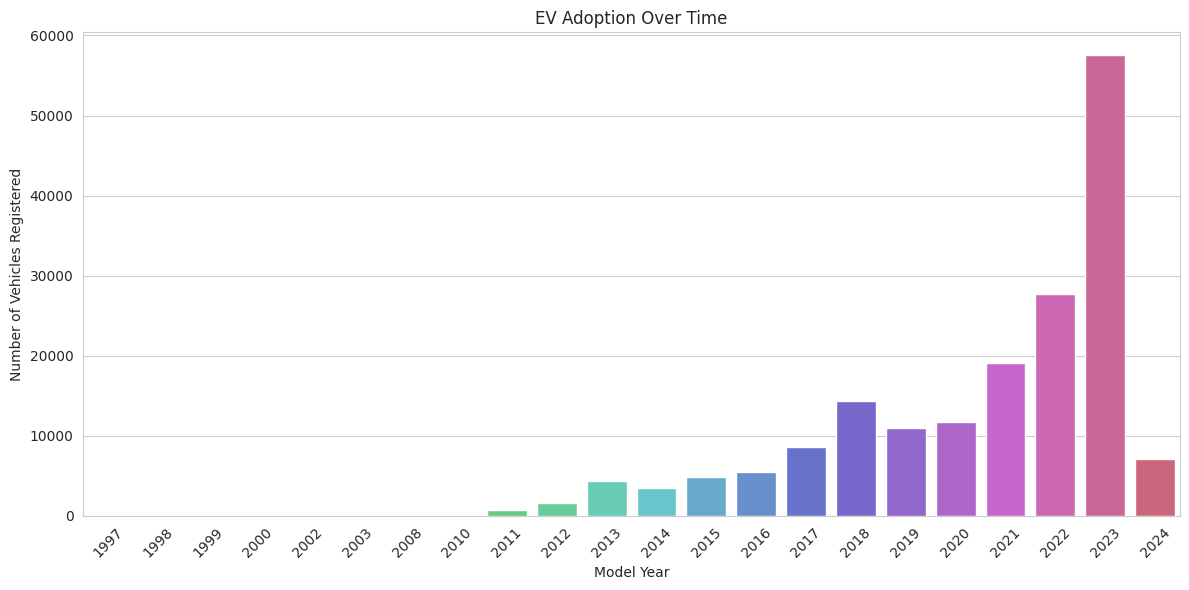

In [44]:
# EV Adoption Over Time
plt.figure(figsize=(12, 6))
ev_adoption_by_year = ev_data['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, y=ev_adoption_by_year.values, palette="hls")
plt.title('EV Adoption Over Time')
plt.xlabel('Model Year')
plt.ylabel('Number of Vehicles Registered')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### The bar chart clearly shows that **EV adoption has been rising over time**, with a noticeable surge starting around **2016**. Initially, the number of registered EVs grew gradually, but from **2017 onward**, the increase became more rapid. The year **2023 stands out with the highest number of registrations**, marking a peak in EV adoption and indicating strong market growth.

Now, let’s start by selecting the top 3 counties based on EV registrations and then analyze the distribution of EVs within the cities of those counties:

In [46]:
#geographical distribution at county level
country_dist = ev_data['County'].value_counts()
top_countries = country_dist.head(3).index

In [47]:
#filtering the dataset for top counties
top_counties_data = ev_data[ev_data['County'].isin(top_countries)]

In [48]:
#analyzing the distribution of EVs within the cities of these counties
city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

In [50]:
# visualize he top 10 cities across these counties
top_cities = city_distribution_top_counties.head(10)

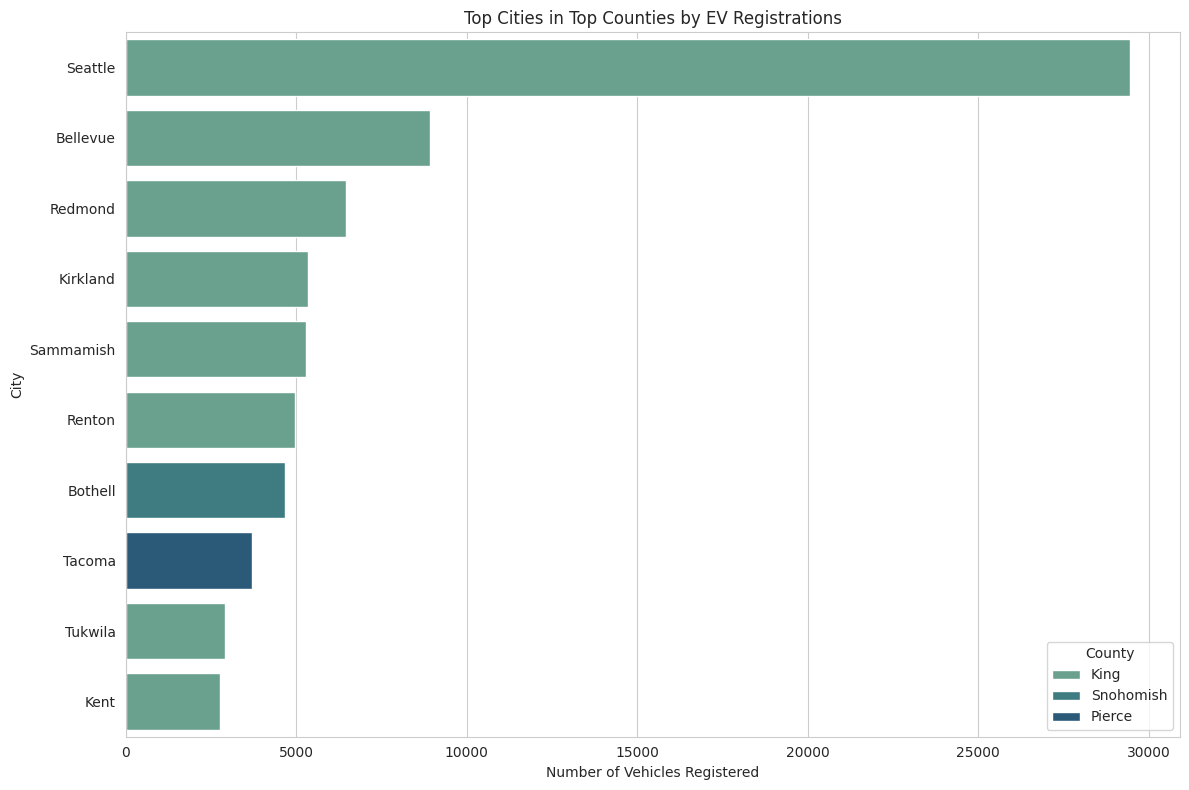

In [56]:
#Visualizing top 10 cities
plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="crest")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

The graph compares **EV registrations across cities in three counties: King, Snohomish, and Pierce**. The horizontal bars show the number of registered EVs, color-coded by county.  

### **Key Insights:**  
- **Seattle (King County) leads EV adoption**, with the highest number of registrations by a large margin.  
- **Bellevue and Redmond (also in King County) follow**, though their numbers are significantly lower than Seattle’s.  
- **Cities in Snohomish County**, like **Kirkland and Sammamish**, have a moderate number of EV registrations.  
- **Pierce County cities, Tacoma and Tukwila, have the lowest registrations**, with Tacoma slightly ahead.  
- **King County dominates overall EV registrations**, indicating higher adoption in this region.  

### **Next Step:**  
Now, let's analyze **the types of electric vehicles (EVs) in the dataset**. Breaking down the data into **Battery Electric Vehicles (BEV) and Plug-in Hybrid Electric Vehicles (PHEV)** will help us understand consumer preferences and how fully electric vs. hybrid EV adoption trends differ. Let’s visualize the distribution of EV types to see which category is more popular!

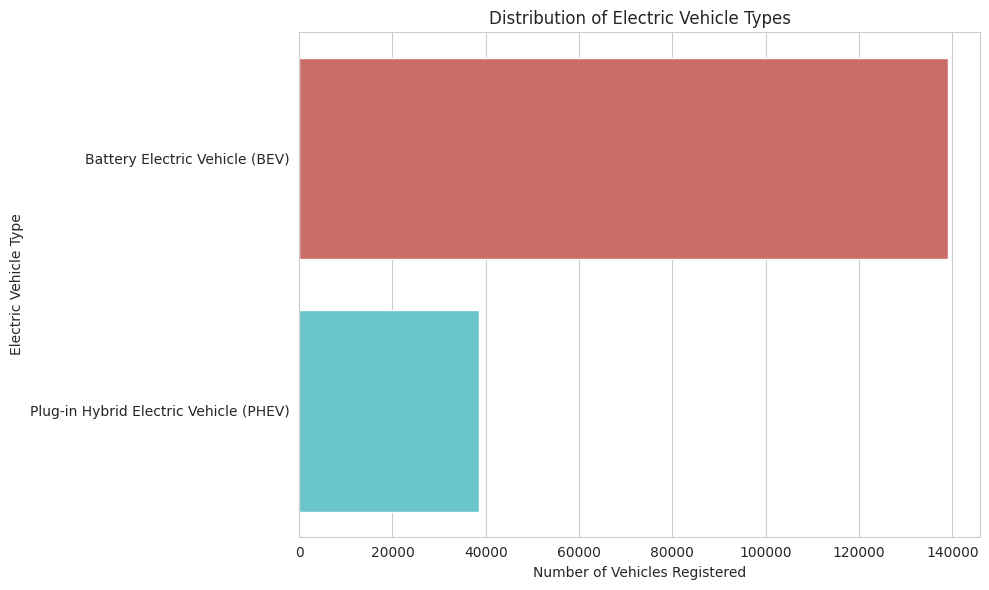

In [60]:
#analyzing the distribution of EV Type
dist_type = ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=dist_type.values, y=dist_type.index, palette="hls")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

The graph indicates that **Battery Electric Vehicles (BEVs) are more popular than Plug-in Hybrid Electric Vehicles (PHEVs)** among registered EVs in the United States. This suggests a stronger consumer preference for fully electric vehicles over hybrids.  

### **Next Step:**  
Now, let's analyze **the popularity of EV manufacturers and models**. This will help us identify which brands and specific models dominate the market, providing insights into **consumer preferences, brand loyalty, and the effectiveness of different manufacturers' strategies** in promoting electric mobility.

Let’s have a look at the most popular manufacturers and then drill down into the most popular models within those manufacturers:

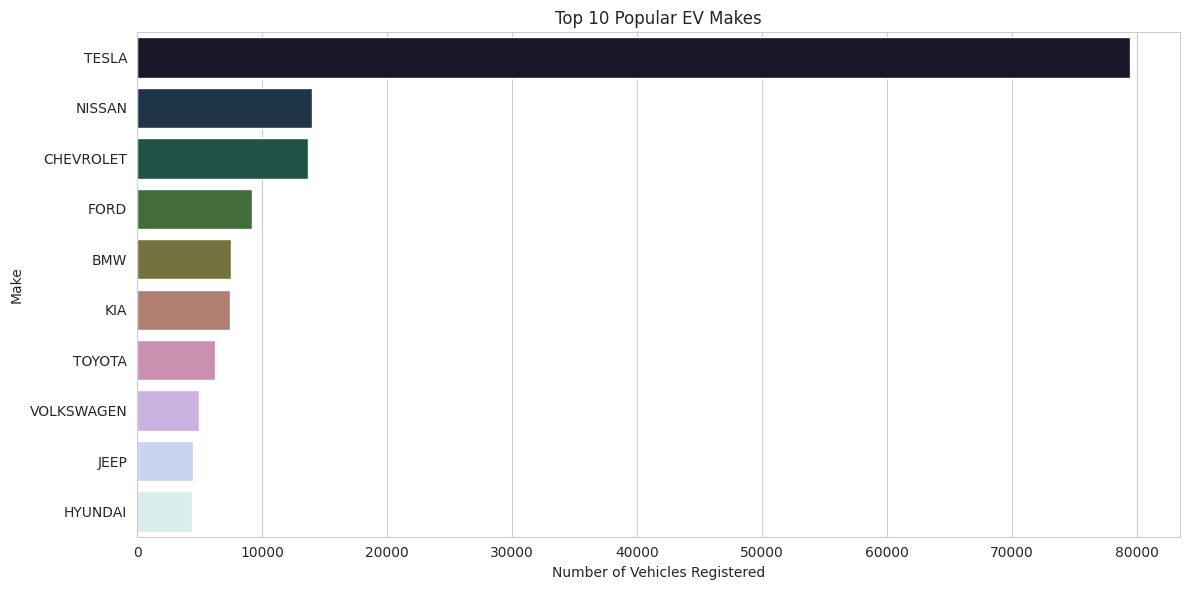

In [61]:
# analyzing the popularity of EV manufacturers
ev_make_distribution = ev_data['Make'].value_counts().head(10)  # Limiting to top 10 for clarity

plt.figure(figsize=(12, 6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

The chart reveals the following key insights about **EV manufacturer popularity**:  

- **TESLA dominates the market**, with the highest number of registered EVs by a large margin.  
- **NISSAN is the second most popular brand**, followed by **CHEVROLET**, though both have significantly fewer registrations compared to TESLA.  
- Other manufacturers, including **FORD, BMW, KIA, TOYOTA, VOLKSWAGEN, JEEP, and HYUNDAI**, follow in decreasing order of registrations.  

### **Next Step:**  
Now, let's take a closer look at **the most popular EV models within these top manufacturers**. This will help us understand **which specific models are driving adoption and shaping consumer preferences** in the EV market.

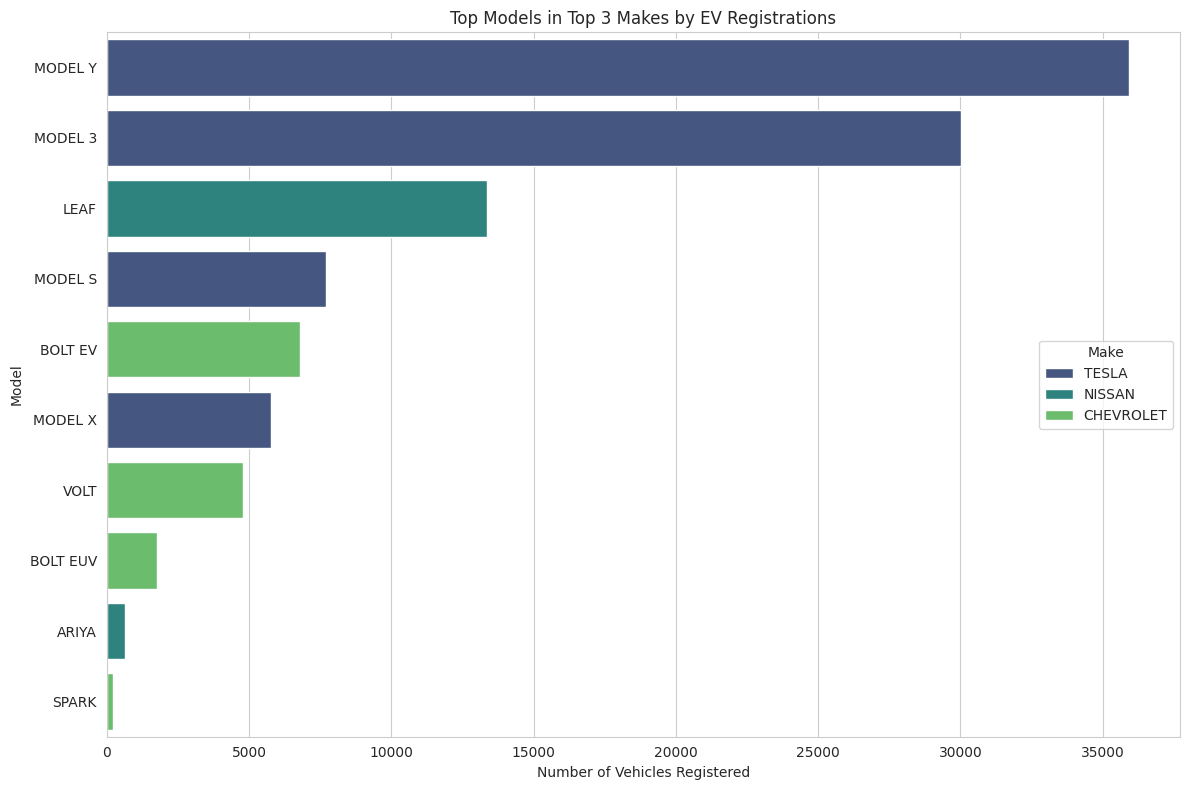

In [62]:
# selecting the top 3 manufacturers based on the number of vehicles registered
top_3_makes = ev_make_distribution.head(3).index

# filtering the dataset for these top manufacturers
top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]

# analyzing the popularity of EV models within these top manufacturers
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualizing the top 10 models across these manufacturers for clarity
top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

The graph illustrates **electric vehicle registrations by model** for the top three manufacturers: **TESLA, NISSAN, and CHEVROLET**.  

### **Key Findings:**  
- **TESLA’s MODEL Y and MODEL 3 dominate**, with MODEL Y having the highest registrations.  
- **NISSAN’s LEAF is the most registered non-TESLA vehicle**, ranking third overall.  
- **TESLA’s MODEL S and MODEL X also have significant registrations.**  
- **CHEVROLET’s BOLT EV and VOLT follow closely, with the BOLT EUV also showing notable numbers.**  
- **NISSAN’s ARIYA and CHEVROLET’s SPARK have the fewest registrations among the listed models.**  

### **Next Step:**  
Now, let’s analyze **the electric range of EVs**, which is crucial for understanding the market’s growth and advancements in battery technology. The **electric range** determines how far an EV can travel on a single charge, and improvements over time indicate technological progress. We’ll examine **the distribution of electric ranges in the dataset** to identify trends such as:  
- **How ranges have improved over the years**  
- **Variations between different vehicle types (BEVs vs. PHEVs)**  
- **Differences among manufacturers**  

Let’s dive into the data and uncover these insights!

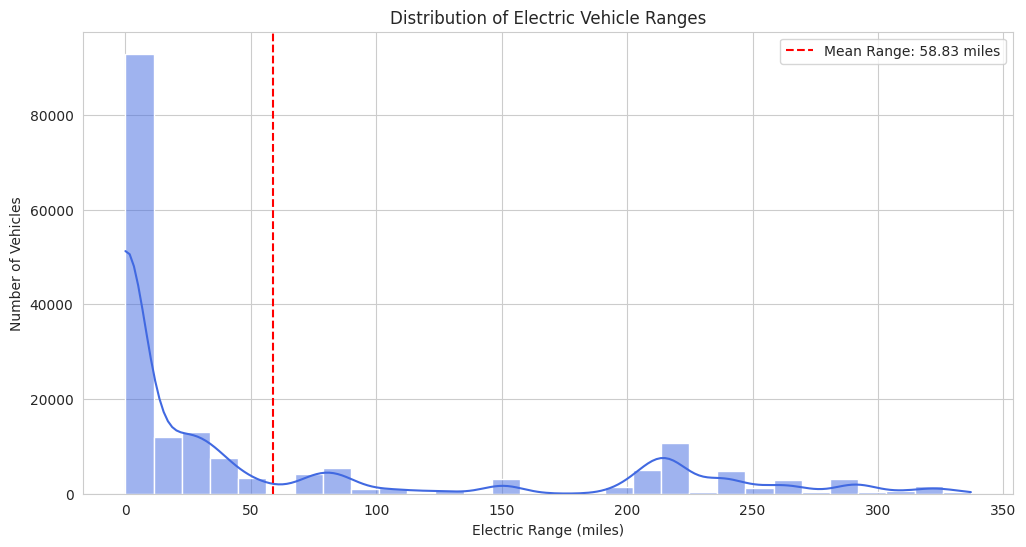

In [63]:
# analyzing the distribution of electric range
plt.figure(figsize=(12, 6))
sns.histplot(ev_data['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

The graph illustrates the **mean electric range of EVs**, with the following key insights:  

- **Most EVs have a lower electric range**, with a noticeable peak just before **50 miles**.  
- The **distribution is right-skewed**, meaning there are fewer vehicles with higher ranges, creating a long tail towards the upper end.  
- The **mean electric range is approximately 58.84 miles**, which is relatively low compared to the highest ranges observed.  
- While some EVs offer ranges up to **350 miles**, the majority fall below the mean, indicating that many models still have limited range capabilities.  
- This suggests that despite advances in battery technology, a large portion of the EV market consists of vehicles with shorter ranges.  

Now, let’s analyze how **electric range has evolved over model years**. This will help us understand how **advancements in battery technology and vehicle design** have influenced the driving range of EVs over time.  

A **positive trend** in this analysis would suggest:  
- Continuous **improvements in battery efficiency**, allowing for longer driving ranges.  
- A potential reduction in **range anxiety**, making EVs more appealing to consumers.  
- Increasing adoption of **high-range EVs**, which could further accelerate market growth.  

Let’s explore the data to see how electric vehicle ranges have progressed over the years! 🚗⚡

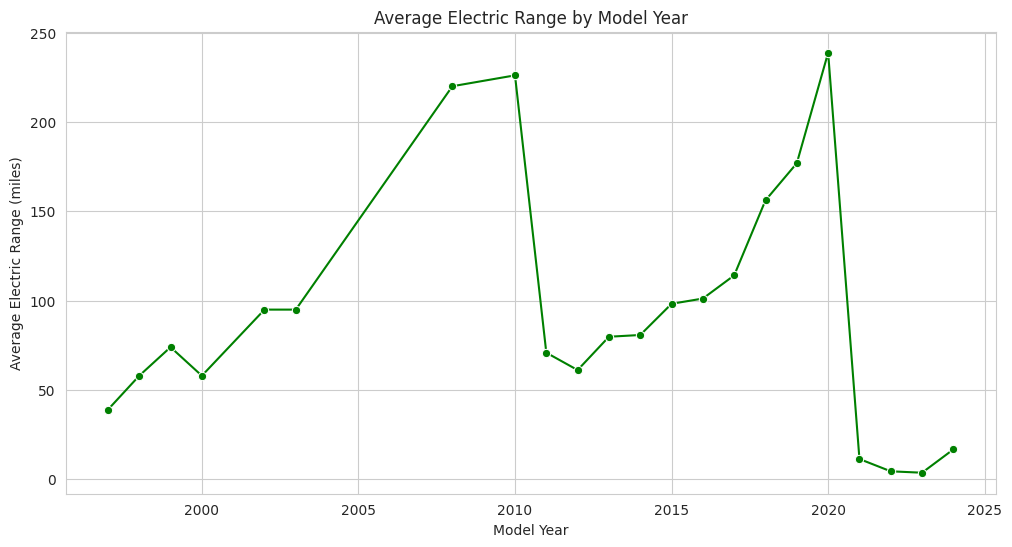

In [64]:
# calculating the average electric range by model year
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

The graph illustrates the **progression of average electric range from 2000 to 2024**, highlighting key trends in EV technology and battery efficiency.  

### **Key Insights:**  
- There is a **general upward trend** in the average electric range over the years, reflecting advancements in battery technology.  
- The **peak occurs around 2020**, when the average range reaches its highest point.  
- After **2020, there is a significant drop**, which could be due to **incomplete data** or the introduction of more **lower-range EV models**.  
- **A slight recovery is observed in the most recent year**, suggesting a possible rebound in longer-range EVs.  
- Despite fluctuations, the overall trend **over the last two decades shows an increase in electric range**, indicating continuous innovation.  

### **Next Step:**  
Now, let’s examine **how electric ranges vary across top manufacturers and models**. This analysis will help us understand:  
- **Which manufacturers are leading in range innovation**  
- **How different models compare in terms of electric range**  
- **How manufacturers balance range with affordability and other features**  

Let’s dive deeper into the data! 🚗⚡

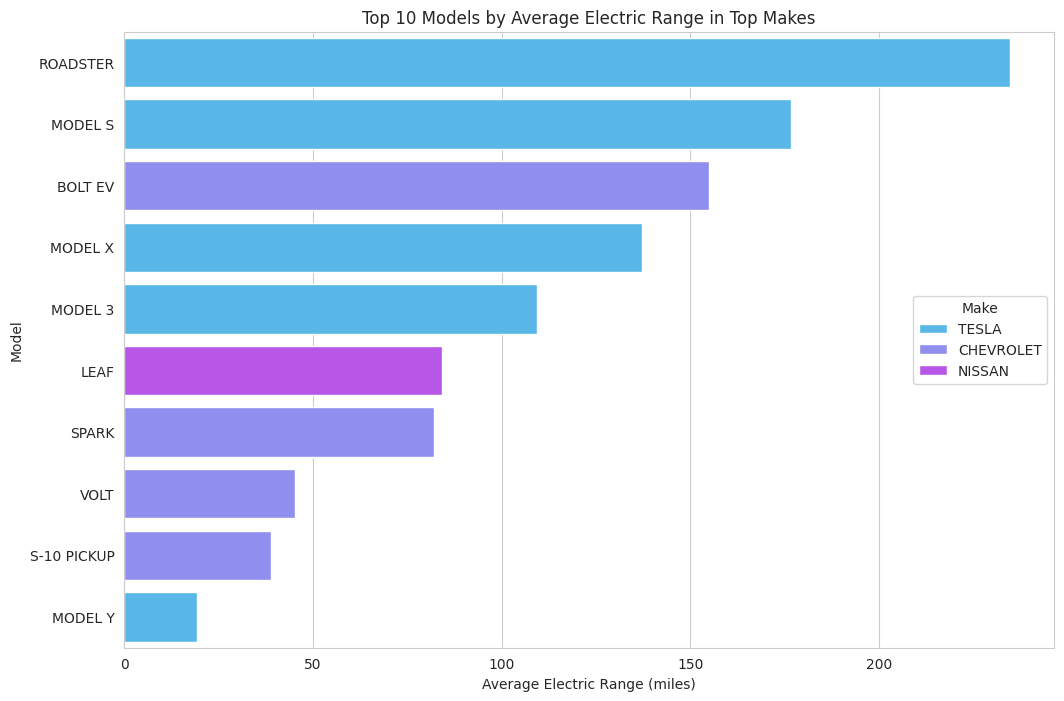

In [65]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

The analysis of **electric range by model** highlights the following key insights:  

- **TESLA ROADSTER has the highest average electric range** among the models listed.  
- **TESLA dominates the top positions**, with **MODEL S, MODEL X, and MODEL 3** also ranking high, indicating that **TESLA vehicles generally offer superior range**.  
- **CHEVROLET BOLT EV stands out** among CHEVROLET models, offering a significantly higher range compared to the **VOLT and S-10 PICKUP**.  
- **NISSAN LEAF and CHEVROLET SPARK** fall into the lower half of the chart, suggesting that they provide **more modest average ranges** compared to premium EV models.  

### **Final Thoughts:**  
This analysis shows that **TESLA leads in electric range innovation**, while other manufacturers have a mix of high- and low-range models. As battery technology continues to evolve, **we may see more manufacturers closing the gap with Tesla, improving overall EV efficiency, and expanding range options for consumers**. 🚗⚡

## Estimated Market Size Analysis of Electric Vehicles in the United States

In [66]:
# calculate the number of EVs registered each year
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

,count
Model Year,
1997,1
1998,1
1999,5
2000,7
2002,2
2003,1
2008,19
2010,23
2011,775


The dataset tracks **EV registrations from 1997 to 2024**, though **2024 data is incomplete (up to March only).**  

### **Recent EV Registration Trends:**  
- **2021:** 19,063 EVs registered  
- **2022:** 27,708 EVs registered (**~45% increase from 2021**)  
- **2023:** 57,519 EVs registered (**~108% increase from 2022**)  
- **2024 (so far):** 7,072 EVs registered (**partial data, only till March**)  

### **Forecasting 2024 and Future Market Growth:**  
To estimate **total 2024 registrations**, we’ll use a **growth rate-based approach**, specifically **Compound Annual Growth Rate (CAGR)** between **2021 and 2023** to predict 2024 numbers.  

Additionally, we’ll use this **CAGR to project the EV market size for the next five years**, helping us understand **future adoption trends**.  

Let’s proceed with these calculations! 🚗⚡

In [67]:
from scipy.optimize import curve_fit
import numpy as np

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 79079.2066611501, 2025: 119653.95934090775, 2026: 181047.21317328632, 2027: 273940.7335817853, 2028: 414496.9933533305, 2029: 627171.2689549965}


### Now, let’s plot the estimated market size data:

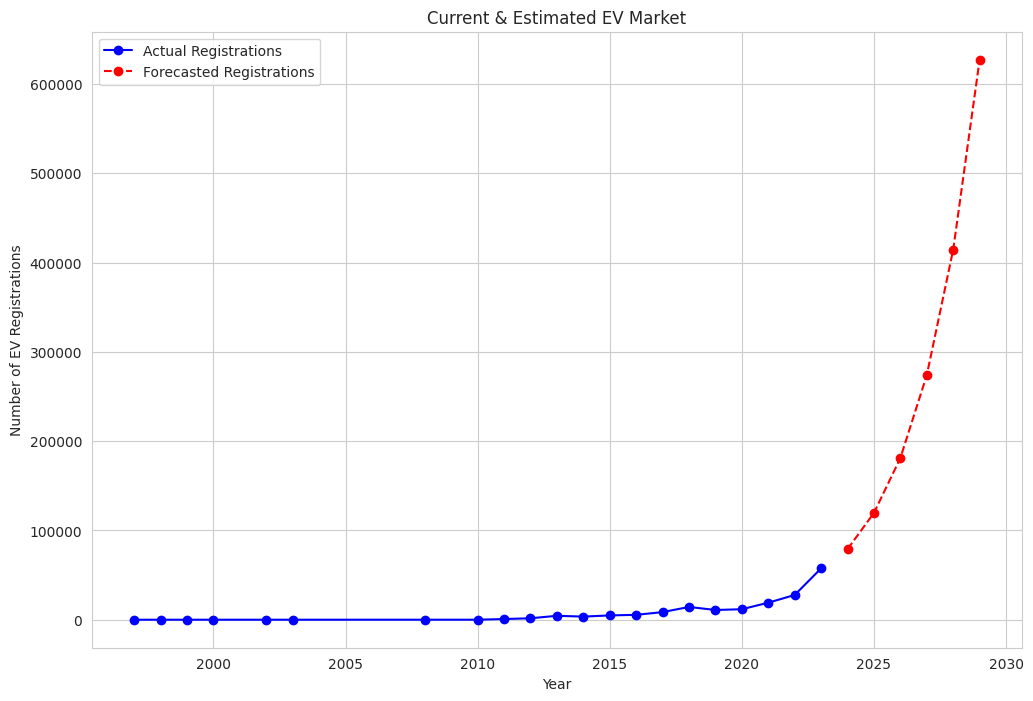

In [68]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()

### **Key Takeaways from the EV Registration Trends:**  

- **Slow growth until 2010:** EV registrations remained **low and stable** before 2010.  
- **Steady increase post-2010:** A **consistent and steep upward trend** indicates rising EV adoption.  
- **Future projections show rapid growth:** The forecast suggests an **even sharper rise** in registrations in the coming years.  

### **What This Means for the EV Market:**  
- The **EV market size is expected to expand significantly**, driven by **higher consumer adoption** and **advancements in EV technology**.  
- The **steep forecasted increase** indicates a major shift in consumer preferences toward EVs.  
- This growth presents **new opportunities for investment, innovation, and infrastructure expansion** in the EV industry.  

Overall, the data suggests a **promising future for the EV sector**, with continued momentum toward a more **sustainable and electrified transportation landscape**. 🚗⚡